In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("iris.csv")

In [7]:
from sklearn.preprocessing import StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [14]:
pca=PCA(n_components=2,whiten='True')
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1', 'principal component 2'])
finaldf=pd.concat([principalDf,df[['species']]],axis=1)

In [15]:
finaldf.head(10)

,principal component 1,principal component 2,species
0,-1.321232,0.500417,setosa
1,-1.214037,-0.702770,setosa
2,-1.379296,-0.356432,setosa
3,-1.341465,-0.622771,setosa
4,-1.394238,0.674312,setosa
5,-1.210927,1.552436,setosa
6,-1.425851,0.049668,setosa
7,-1.302647,0.232627,setosa
8,-1.362034,-1.162705,setosa
9,-1.274341,-0.488937,setosa


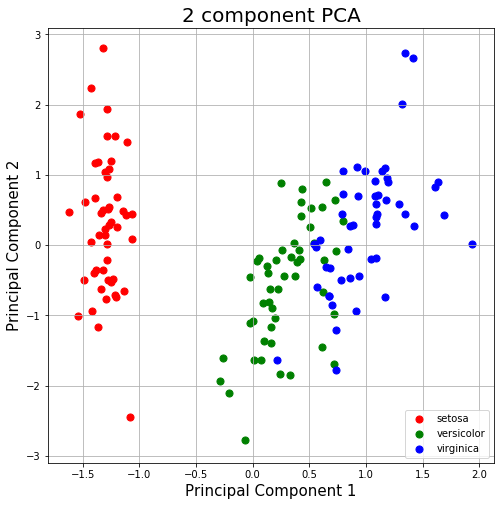

In [16]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize=15)
ax.set_ylabel('Principal Component 2',fontsize=15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['species'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1'], finaldf.loc[indicesToKeep, 'principal component 2'],c = color,s = 50)
ax.legend(targets)
ax.grid()

C:\Users\amrut\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


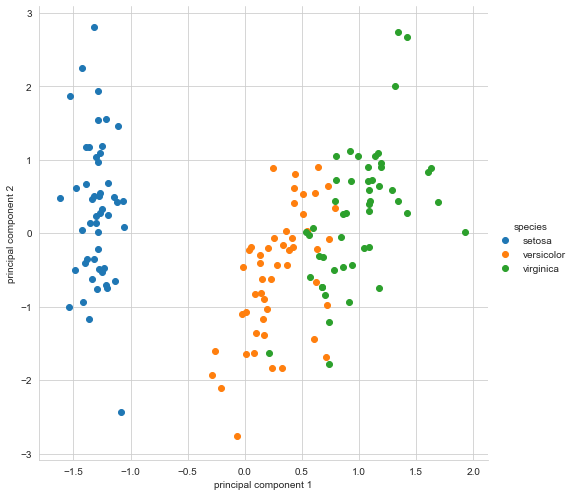

In [17]:
import seaborn as sns
sns.set_style('whitegrid')
#sns.set_title('Dimensionality Reduction Using PCA')
sns.FacetGrid(finalDf,hue='species',size=7).map(plt.scatter,'principal component 1','principal component 2').set_titles('Dimensionality Reduction using PCA').add_legend()
plt.show()

C:\Users\amrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\amrut\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\amrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del

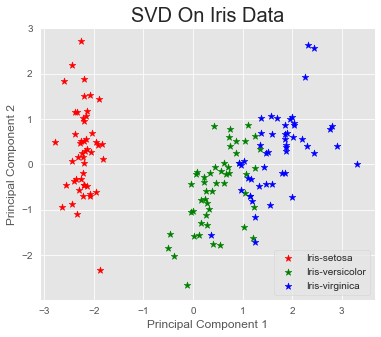

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(6, 5))
 
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, sep=',')
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
 
X = df.ix[:,0:4].values
y = df.ix[:,4].values
 
X_scaled = StandardScaler().fit_transform(X)
 
svd = TruncatedSVD(n_components=2)
Y_fitted = svd.fit_transform(X_scaled)
 
for labels, columns in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('red', 'green', 'blue')):
    plt.scatter(Y_fitted[y==labels, 0],Y_fitted[y==labels, 1],label=labels,c=columns,marker='*', s=50)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.title("SVD On Iris Data", fontsize=20)
plt.show()